In [1]:
import sys
sys.path.append("../../diffusion_models")
import torch
import os
from models.diffusion import ForwardDiffusion, DiffusionModel
from torchvision.io import read_image
import matplotlib.pyplot as plt
from utils.datasets import FastMRIBrainTrain

In [12]:
fwd_diff = ForwardDiffusion(
    timesteps = 1000,
    type = "cosine"
)

In [13]:
head.shape

torch.Size([16, 1, 256, 256])

In [69]:
interval = 100
batch_size = 50
head = FastMRIBrainTrain("/itet-stor/peerli/bmicdatasets-originals/Originals/fastMRI/brain/multicoil_train", size=256)
head = head.__getitem__(0)[0].unsqueeze(0).repeat(batch_size,1,1,1)

noisies1 = [fwd_diff(head, torch.tensor([i*interval], dtype=torch.long))[0] for i in range(10)]
noisies2 = [fwd_diff.forward_flexible(
    head,
    torch.tensor([0], dtype=torch.long).repeat(batch_size),
    torch.tensor([0], dtype=torch.long).repeat(batch_size)
)[0]]
for i in range(9):
    out = fwd_diff.forward_flexible(
        noisies2[-1], 
        torch.tensor([(i)*interval], dtype=torch.long).repeat(batch_size), 
        torch.tensor([(i+1)*interval], dtype=torch.long).repeat(batch_size)
    )
    noisies2.append(out[0])

(4, 10)


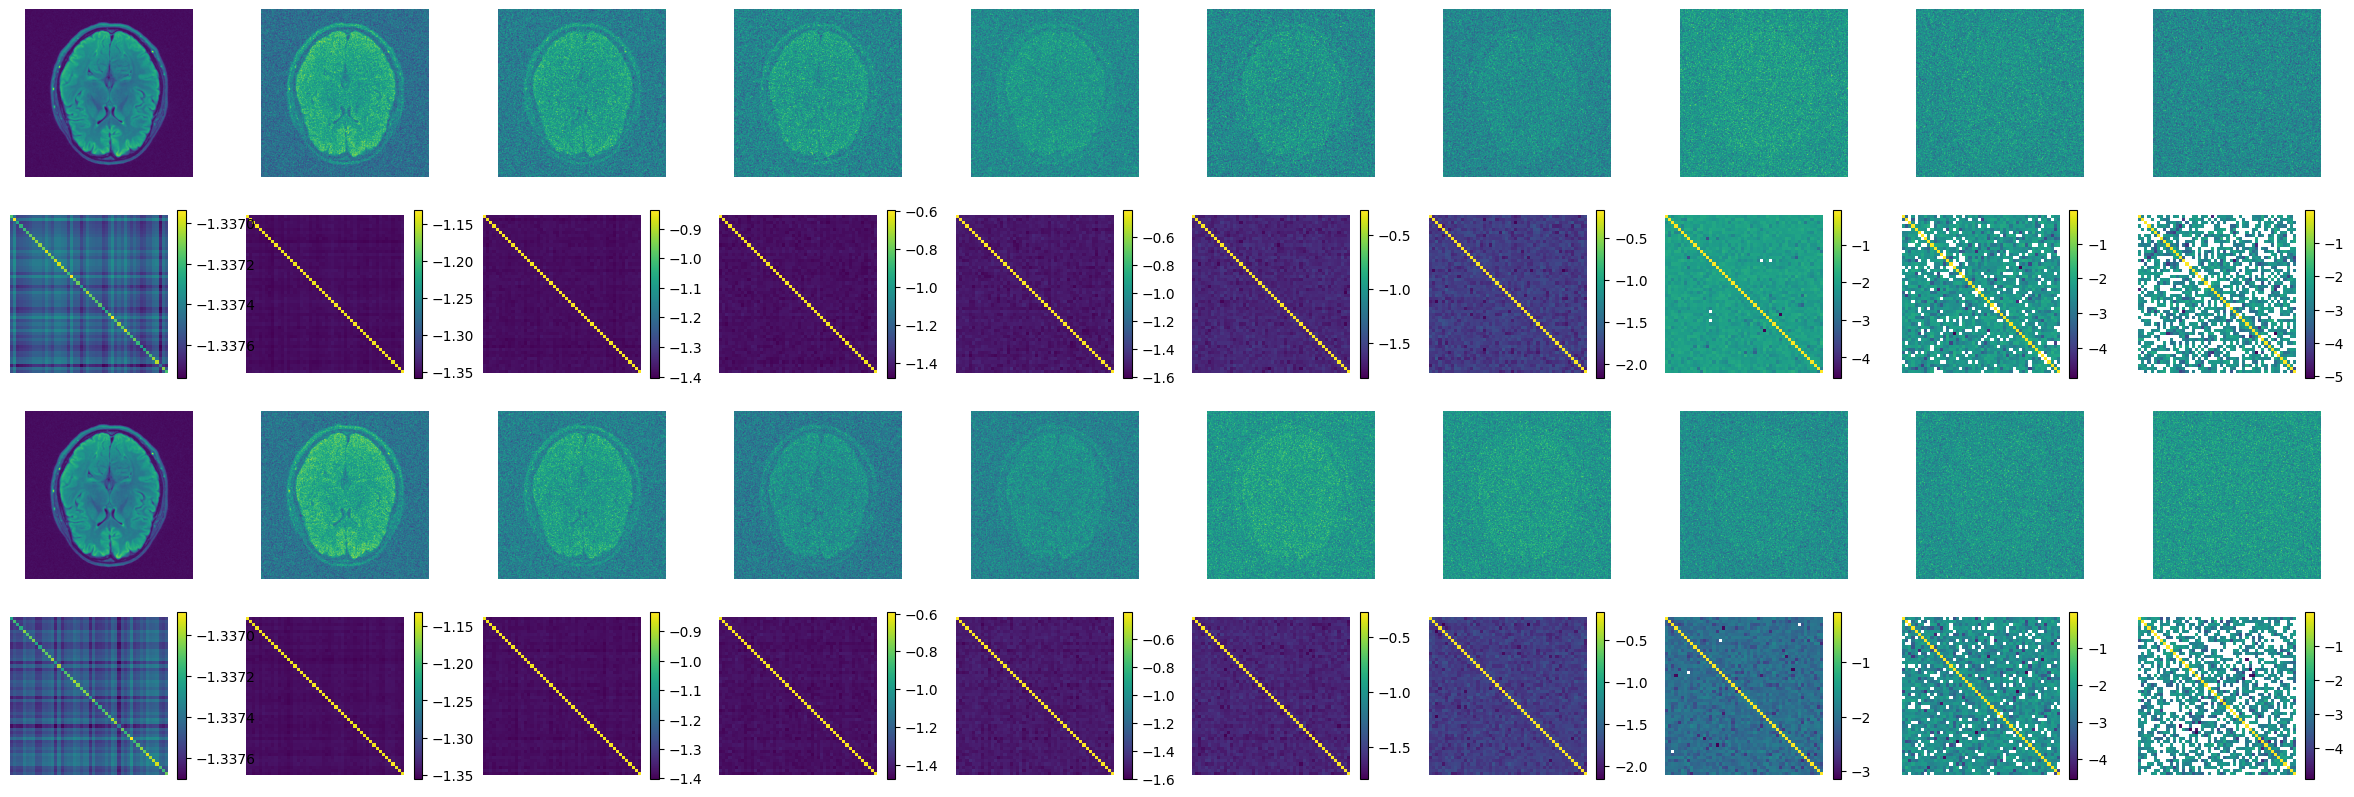

In [71]:
fig, ax = plt.subplots(4,10, figsize=(30,10))
for elem in ax.reshape(-1):
    elem.axis("off")
for i, elem in enumerate(noisies1):
    ax[0,i].imshow(elem[0].squeeze())
    cov = torch.cov(elem.view(elem.shape[0], -1))
    dummy = ax[1,i].imshow(torch.log10(cov))
    plt.colorbar(dummy, ax=ax[1,i])
for i, elem in enumerate(noisies2):
    ax[2,i].imshow(elem[0].squeeze())
    cov = torch.cov(elem.view(elem.shape[0], -1))
    dummy = ax[3,i].imshow(torch.log10(cov))
    plt.colorbar(dummy, ax=ax[3,i])
print(ax.shape)